<a href="https://colab.research.google.com/github/shivanshtiwari14/Boston_Housing/blob/main/Boston_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
boston =  load_boston() 

In [ ]:
X = boston.data
y = boston.target

In [ ]:
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
u

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [ ]:
X = (X-u)/std
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


(506,)

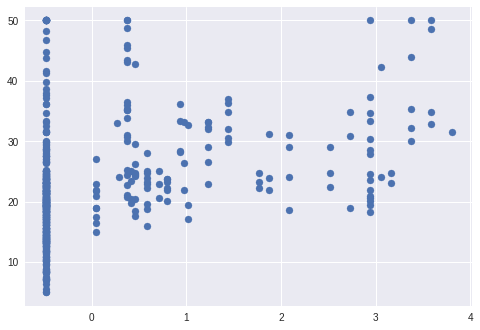

In [ ]:
plt.style.use("seaborn")
plt.scatter(X[:,1],y)
y.shape

In [ ]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
X.shape

(506, 14)

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,1.0,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.0,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.0,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.0,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


##Algorithm

In [ ]:
def hypothesis(x,theta):
    y_ = 0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_

def error(X,y,theta):
    e = 0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        
    return e/m

def gradient(X,y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        
    return theta,error_list

In [ ]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print(end - start)

19.823094367980957


In [ ]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

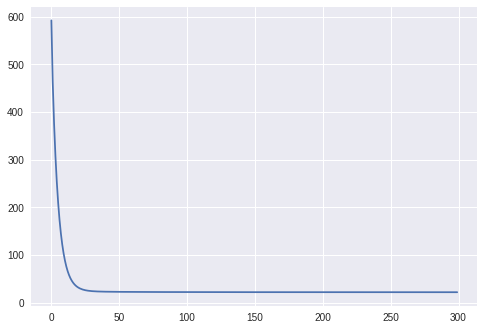

In [ ]:
plt.plot(error_list)

In [ ]:
y_ = []
for i in range(X.shape[0]):
  pred = hypothesis(X[i],theta)
  y_.append(pred)
y_ = np.array(y_)

In [ ]:
def r2_score(y,y_):
  num = np.sum((y - y_)**2)
  den = np.sum((y - y.mean())**2)
  score = 1 -(num/den)
  return score*100
r2_score(y,y_)

74.04541323942743

##Optimized

In [ ]:
def hypothesis(X,theta):
  return np.dot(X,theta)

def error(X,y,theta):
  m = X.shape[0]
  y_ = hypothesis(X,theta)
  e = np.sum((y - y_)**2)
  return e/m

def gradient(X,y,theta):
  y_ = hypothesis(X,theta)
  grad = np.dot(X.T,(y_ - y))
  m = X.shape[0]
  return grad/m

def gradientdescent(X,y,learning_rate=0.1,max_steps=300):
  m,n =  X.shape
  theta = np.zeros((n,))
  error_list = []
  for i in range(max_steps):
    e = error(X,y,theta)
    error_list.append(e)
    grad = gradient(X,y,theta)
    theta = theta - learning_rate*grad

  return theta,error_list
  


In [ ]:
y_ = hypothesis(X,theta)
y_.shape

(506,)

In [ ]:
import time
start = time.time()
theta,error_list = gradientdescent(X,y)
end = time.time()
print(end - start)

0.016479015350341797


In [ ]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

#SK-LEARN

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
theta_s = model.coef_

In [ ]:
pred = model.predict(X)

In [ ]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)